<a href="https://colab.research.google.com/github/Pacifier25/ZTM-Tensorflow-course/blob/main/07_introduction_to_nlp_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction Natural Language Processing Basics in TensorFlow

NLP has the goal of deriving information out of natural language(could be text or speech)

Another common term of NLP problems is sequence to sequence

In [1]:
!nvidia-smi

Fri May 28 11:02:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Get helper functions

In [2]:
!wget https://raw.githubusercontent.com/Pacifier25/ZTM-Tensorflow-course/main/helper_function/helper.py

--2021-05-28 11:02:39--  https://raw.githubusercontent.com/Pacifier25/ZTM-Tensorflow-course/main/helper_function/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10510 (10K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  10.26K  --.-KB/s    in 0s      

2021-05-28 11:02:39 (112 MB/s) - ‘helper.py’ saved [10510/10510]



In [3]:
# Import series of helper functions for the notebook
from helper import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset 

The data set we are going to use is Kaggle introduction to NLP dataset(text sample to tweets labelled as disaster or non disaster).

Here is the data:https://www.kaggle.com/c/nlp-getting-started/data

In [4]:
# Download data (same as from Kaggle)
!wget  "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2021-05-28 11:02:41--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c03::80, 2607:f8b0:4023:c06::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2021-05-28 11:02:41 (112 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Visualizing a text dataset

To visualize our text sample we first have to read them in one way to do so is https://realpython.com/read-write-files-python/

But i get to get visual straight away

so another way to do se is to use pandas

In [5]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
train_df["text"][1]

'Forest fire near La Ronge Sask. Canada'

In [7]:

# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac = 1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [8]:
# The test data doesn't have a target (that's what we'd try to predict)
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [9]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
# How many samples total?
print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")
print(f"Total samples: {len(train_df) + len(test_df)}")

Total training samples: 7613
Total test samples: 3263
Total samples: 10876


In [11]:
# Let's visualize some random training examples
import random

random_index = random.randint(0,len(train_df)) # create random indexes not higher than the total number of samples
for row in train_df_shuffled [["text","target"]][random_index:random_index+5].itertuples():
  _,text,target = row
  print(f"target: {target}","(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")


target: 0 (not real disaster)
Text:
Former Township fire truck being used in Philippines - Langley Times http://t.co/iMiLsFxntf #filipino

---

target: 0 (not real disaster)
Text:
'Hey bitch blow me' uh no. Stick your dick in some water then an outlet so u get electrocuted..

---

target: 1 (real disaster)
Text:
Looks like a perfect storm-free evening coming up.  Check out the outdoor happenings featured at http://t.co/hUzrHgmkSY #EventsPalmBeach.

---

target: 0 (not real disaster)
Text:
Rick and Morty - They Blew Up : http://t.co/UQKX5VbiuM

---

target: 0 (not real disaster)
Text:
I've been meaning to harm you in the best way I see fit??

---



# Split data into training and validation sets

In [12]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentence,val_sentence,train_label,val_label = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                     train_df_shuffled["target"].to_numpy(),
                                                                     test_size = 0.1,# dedicate 10% of samples to validation set
                                                                     random_state = 42)# random state for reproducibility

In [13]:
# Check the lengths
len(train_sentence), len(train_label), len(val_sentence), len(val_label)

(6851, 6851, 762, 762)

In [14]:
# View the first 10 training sentences and their labels
train_sentence[:10], train_label[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

# Converting text into numbers

When dealing with text problem one of the first thing you'll have to do before you can build a model is to convert your text to answer

There are few ways to build this:

1. Tokenization - direct mapping of token(a token could be a word or a character) to a number

2. Embedding - Create a matrix of feature vector for each token(the size of the feature vector can be defined and this embedding can be learned)

## Text vectorization (tokenization)

In [15]:
train_sentence[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorization = TextVectorization(max_tokens = None, # how many words in the vocabulary (all of the different words in your text)
                                       standardize = "lower_and_strip_punctuation", # how to process text
                                       split = "whitespace",# how to split tokens
                                       ngrams = None, # create groups of n-words?
                                       output_mode = "int", # how to map tokens to numbers
                                       output_sequence_length = None, # how long should the output sequence of tokens be?
                                       pad_to_max_tokens = True)

In [17]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split())for i in train_sentence])/ len(train_sentence))

15

In [18]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [19]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentence)

In [20]:
# Create sample sentence and tokenize it
sample_sentence = "There's a flood in my city"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 182,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [21]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentence)
print(f"Original text:\n{random_sentence}\n\n Vectorized version :")
text_vectorizer([random_sentence])

Original text:
320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/M4JDZMGJoW | @djicemoon | #Dubstep #TrapMusic #DnB #EDM #Dance #IcesÛ_ http://t.co/n0uhAsfkBv

 Vectorized version :


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[2582, 2420, 2428,  966,    1, 2490, 2133, 2249, 2138, 1685, 1307,
        2427,    1,    0,    0]])>

In [22]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:]# least common tokens
print(f"Number of words in vocab:{len(words_in_vocab)}")
print(f"Top 5 most common words : {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab:10000
Top 5 most common words : ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# Creating an Embedding using an Embedding Layer

To make our embedding we are going to use tensorflow embedding's layers

The main parameters we're concerned about here are:

* **input_dim** - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
* **output_dim** - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* **input_length** - Length of sequences being passed to embedding layer.

In [23]:
embedding = tf.keras.layers.Embedding(input_dim = max_vocab_length,# set input shape
                                      output_dim = 128,# set size of embedding vector
                                      embeddings_initializer = "uniform", # default, intialize randomly
                                      input_length = max_length)# how long is each input
embedding

In [24]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentence)
print(f"Original text:\n {random_sentence}\n\n Embedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 Alhaji Putin is far from being a good person sha. At least I had front row seat to his complete obliteration of Ibeto cement a competitor.

 Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.0321216 , -0.01617037,  0.013471  , ...,  0.04952255,
          0.02768001, -0.04662972],
        [-0.03936365, -0.01575228,  0.02051998, ...,  0.03571549,
          0.01827404,  0.01894157],
        [ 0.04327028,  0.04041355,  0.00631315, ...,  0.04916139,
         -0.01485412, -0.03350045],
        ...,
        [ 0.01448599, -0.00990849, -0.01518555, ...,  0.04542223,
          0.04412622, -0.04585706],
        [-0.01084422, -0.03021554, -0.01043991, ...,  0.0223393 ,
         -0.04170129, -0.03907288],
        [-0.04032727,  0.02777326, -0.01860743, ..., -0.01478362,
         -0.02034804,  0.01503788]]], dtype=float32)>

In [25]:
# Check out a single token's embedding
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.0321216 , -0.01617037,  0.013471  ,  0.03521544, -0.03382201,
       -0.01228849,  0.04108198,  0.03392367, -0.00834386, -0.02504237,
       -0.01899121,  0.02930398, -0.02103047, -0.03049849,  0.03241463,
       -0.00655087,  0.01859364, -0.03772767,  0.00726143,  0.0015452 ,
        0.00077871, -0.01065295, -0.01978164, -0.0135564 , -0.01873487,
       -0.01322822, -0.04686267, -0.02613121, -0.01429467, -0.01174391,
        0.04289973, -0.04692353,  0.01344571, -0.02172827,  0.03132811,
        0.0368593 , -0.0060013 ,  0.00074791, -0.04026915, -0.02965154,
       -0.03229355, -0.04189522,  0.01835338,  0.02737785,  0.03343629,
        0.03000983,  0.04874646,  0.03970292, -0.02518453, -0.00337268,
       -0.01974609, -0.02594532,  0.00850947, -0.04339113, -0.01937522,
        0.01807928,  0.04397866, -0.02749074, -0.03889392, -0.01903341,
       -0.04320177,  0.00351089,  0.04814209,  0.04148097, -0.00306989,
        0.038564

# Modelling a text dataset(running a series of experiment)

Now we have got a way to turn our text sequences into number, it's time to start building a series of modelling experiment

* **Model 0**: Naive Bayes (baseline)
* **Model 1**: Feed-forward neural network (dense model)
* **Model 2**: LSTM model
* **Model 3**: GRU model
* **Model 4**: Bidirectional-LSTM model
* **Model 5**: 1D Convolutional Neural Network
* **Model 6**: TensorFlow Hub Pretrained Feature Extractor
* **Model 7**: Same as model 6 with 10% of training data

How we are going to approach all of these

Each experiment will go through the following steps:

* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison

# Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a baseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll create a Scikit-Learn Pipeline using the TF-IDF (term frequency-inverse document frequency) formula to convert our words to numbers and then model them with the Multinomial Naive Bayes algorithm.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf",TfidfVectorizer()),# convert words to numbers using tfidf
                    ("clf",MultinomialNB()) # model the text
])
# Fit the pipeline to the training data
model_0.fit(train_sentence,train_label)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [27]:
baseline_score = model_0.score(val_sentence,val_label)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [28]:
# Make predictions
baseline_preds = model_0.predict(val_sentence)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

## Creating an evaluation function for our model experiments

We could evaluate these as they are but since we're going to be evaluating several models in the same way going forward, let's create a helper function which takes an array of predictions and ground truth labels and computes the following:

* Accuracy
* Precision
* Recall
* F1-score

In [29]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_preds):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true,y_preds)*100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision,model_recall,model_f1, _ = precision_recall_fscore_support(y_true,y_preds,average = "weighted")
  model_results = {
      "accuracy":model_accuracy,
      "precision":model_precision,
       "recall":model_recall,
       "f1":model_f1
  }
  return model_results

In [30]:
# Get the baseline results
baseline_results = calculate_results(y_true = val_label,
                                     y_preds = baseline_preds)

baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

# Model 1: A simple dense model

In [31]:
# Create tensorboard callback (need to create a new one for each model)
from helper import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [32]:
# Create directory to save TensorBoard logs
inputs = tf.keras.layers.Input(shape = (1,),dtype = "string") # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numerized numbers
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)# create the output layer, want binary outputs so use sigmoid activation
model_1 = tf.keras.Model(inputs,outputs,name = "model_1_dense")# construct the model

In [33]:
# Compile model
model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [34]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Fit the model
model_1_history = model_1.fit(train_sentence,
                              train_label,
                              epochs = 5,
                              validation_data = (val_sentence,val_label),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20210528-110249
Epoch 1/5
215/215 [==============================] - 7s 17ms/step - loss: 0.6137 - accuracy: 0.6904 - val_loss: 0.5345 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4424 - accuracy: 0.8170 - val_loss: 0.4694 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3469 - accuracy: 0.8610 - val_loss: 0.4581 - val_accuracy: 0.7835
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2845 - accuracy: 0.8883 - val_loss: 0.4632 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2374 - accuracy: 0.9117 - val_loss: 0.4792 - val_accuracy: 0.7769


In [36]:
# Check the model result
model_1.evaluate(val_sentence,val_label)

24/24 [==============================] - 0s 3ms/step - loss: 0.4792 - accuracy: 0.7769


[0.4791974127292633, 0.7769029140472412]

In [37]:
model_1_preds = model_1.predict(val_sentence)

In [38]:
model_1_pred_prob = tf.squeeze(tf.round(model_1_preds))

In [39]:
model_1_results = calculate_results(y_true = val_label,
                                    y_preds = model_1_pred_prob)
model_1_results

{'accuracy': 77.69028871391076,
 'f1': 0.7751243211017478,
 'precision': 0.7781874595396938,
 'recall': 0.7769028871391076}

# Visualizing learned embeddings

In [40]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab),words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [41]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Get the weight matrix of embedding layer 
# (these are the numerical patterns between the text in the training dataset the model has learned)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [44]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [45]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1. Go to http://projector.tensorflow.org/
2. Click on "Load data"
3. Upload the two files you downloaded (embedding_vectors.tsv and embedding_metadata.tsv)
4. Explore
5. Optional: You can share the data you've created by clicking "Publish"

# Recurrent Neural Networks (RNN's)

RNN's is useful for sequence data

The premise of recurent neural network is to use the representation of previous input to aid the representation of later output

## Model 2: LSTM

LSTM = long short term memory(one of the most popular LSTM cell)

Our structure of RNN typically looks like this

`Input (text) -> Tokenize -> Embedding -> Layers -> Output (label probability)`

In [46]:
# Create LSTM model
from tensorflow.keras import layers
inputs = tf.keras.layers.Input(shape = (1,),dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
print(x.shape)
# x = tf.keras.layers.LSTM(64,return_sequences=True)(x)  # return vector for each word in the Tweet (you can stack RNN cells as long as return_sequences=True)
x  = tf.keras.layers.LSTM(64)(x) # return vector for whole sequence
print(x.shape)
# x = tf.keras.layers.Dense(64,activation = tf.keras.activations.relu)(x)
outputs = tf.keras.layers.Dense(1,activation = "sigmoid")(x)
model_2 = tf.keras.Model(inputs,outputs,name ="model_2_LSTM")


(None, 15, 128)
(None, 64)


In [47]:
model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [48]:
model_2_history = model_2.fit(train_sentence,
                              train_label,
                              epochs = 5,
                              validation_data = (val_sentence,val_label),
                              callbacks = [create_tensorboard_callback(SAVE_DIR,
                                                                       "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20210528-110538
Epoch 1/5
215/215 [==============================] - 9s 21ms/step - loss: 0.2221 - accuracy: 0.9238 - val_loss: 0.5720 - val_accuracy: 0.7848
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1567 - accuracy: 0.9432 - val_loss: 0.6299 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.1252 - accuracy: 0.9531 - val_loss: 0.7935 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1070 - accuracy: 0.9574 - val_loss: 0.8478 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0825 - accuracy: 0.9704 - val_loss: 1.0090 - val_accuracy: 0.7690


In [49]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict(val_sentence)
model_2_pred_probs.shape,model_2_pred_probs[:10]

((762, 1), array([[4.3194368e-03],
        [8.2260782e-01],
        [9.9976772e-01],
        [7.0212901e-02],
        [4.8676159e-04],
        [9.9903631e-01],
        [6.4431357e-01],
        [9.9984741e-01],
        [9.9972683e-01],
        [5.4219866e-01]], dtype=float32))

In [51]:
# Round out predictions and reduce to 1-dimensional array
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [52]:
# Calculate LSTM model results
model_2_results = calculate_results(y_true=val_label,
                                    y_preds=model_2_preds)
model_2_results

{'accuracy': 76.9028871391076,
 'f1': 0.766385677090764,
 'precision': 0.7717390408616506,
 'recall': 0.7690288713910761}

In [53]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

# Model 3: GRU

Another popular and effective RNN component is the GRU or gated recurrent unit.

The GRU cell has similar features to an LSTM cell but has less parameters.

In [54]:
# Build an RNN using the GRU cell
inputs = tf.keras.layers.Input(shape = (1,),dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = tf.keras.layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)
model_3 = tf.keras.Model(inputs,outputs,name = "model_3_GRU")


In [55]:
model_3.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [56]:
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 64)                37248     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Fit model
model_3_history = model_3.fit(train_sentence,
                              train_label,
                              epochs =5,
                              validation_data = (val_sentence,val_label),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20210528-110602
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.1640 - accuracy: 0.9355 - val_loss: 0.6819 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0867 - accuracy: 0.9688 - val_loss: 0.8439 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0731 - accuracy: 0.9714 - val_loss: 1.0344 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0584 - accuracy: 0.9755 - val_loss: 1.1040 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0593 - accuracy: 0.9753 - val_loss: 1.1702 - val_accuracy: 0.7782


In [58]:
# Make predictions on the validation data
model_3_pred_probs = model_3.predict(val_sentence)
model_3_pred_probs.shape,model_3_pred_probs[:10]

((762, 1), array([[1.2900339e-03],
        [7.6996857e-01],
        [9.9969935e-01],
        [8.5849516e-02],
        [5.6807334e-05],
        [9.9733222e-01],
        [3.8718441e-01],
        [9.9985445e-01],
        [9.9979216e-01],
        [9.3607241e-01]], dtype=float32))

In [59]:
# Convert prediction probabilities to prediction classes
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)>

In [60]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true = val_label,
                                    y_preds = model_3_preds)
model_3_results

{'accuracy': 77.82152230971128,
 'f1': 0.7758810170952618,
 'precision': 0.7807522349051432,
 'recall': 0.7782152230971129}

# Model 4: Bidirectonal RNN model

Normal RNN goes from left to right(just like you read an english sentence) however a bidirectional RNN goes from right to left as well as left to right

In [61]:
# Build a Bidirectional RNN in TensorFlow
inputs = tf.keras.layers.Input(shape = (1,),dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN layers requires return_sequences=True
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)(x)
model_4 = tf.keras.Model(inputs,outputs,name = "model_4_bidirectional")


🔑 **Note**: You can use the Bidirectional wrapper on any RNN cell in TensorFlow. For example, layers.Bidirectional(layers.GRU(64)) creates a bidirectional GRU cell.

In [62]:
# Compile
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [63]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(train_sentence,
                              train_label,
                              epochs = 5,
                              validation_data = (val_sentence,val_label),
                              callbacks = [create_tensorboard_callback(dir_name = SAVE_DIR,
                                                                       experiment_name = "bidirectional_RNN")])

Saving TensorBoard log files to: model_logs/bidirectional_RNN/20210528-110626
Epoch 1/5
215/215 [==============================] - 8s 24ms/step - loss: 0.1085 - accuracy: 0.9653 - val_loss: 0.9088 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0525 - accuracy: 0.9756 - val_loss: 1.3342 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0468 - accuracy: 0.9793 - val_loss: 1.3535 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0456 - accuracy: 0.9797 - val_loss: 1.1790 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 4s 17ms/step - loss: 0.0410 - accuracy: 0.9799 - val_loss: 1.3545 - val_accuracy: 0.7743


In [65]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(val_sentence)
model_4_pred_probs[:10]

array([[4.1518551e-03],
       [8.7457448e-01],
       [9.9996305e-01],
       [2.4180806e-01],
       [3.4741068e-05],
       [9.9975175e-01],
       [5.5741405e-01],
       [9.9998820e-01],
       [9.9996603e-01],
       [9.9861658e-01]], dtype=float32)

In [66]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [67]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(val_label,model_4_preds)
model_4_results

{'accuracy': 77.42782152230971,
 'f1': 0.7715524459329461,
 'precision': 0.7775061562364454,
 'recall': 0.7742782152230971}

# Convolutional Neural Networks for Text

We have used CNN's for images but images are typically 2D(height x width)... however our data is 1D

Previously we have used Conv2D for our images data but now we are going to use Conv1D 

The typical structure of Conv1D model sequence(in our case,text)

A typical CNN architecture for sequences will look like the following:

```
Inputs (text) -> Tokenization -> Embedding -> Layers -> Outputs (class probabilities)
```

### Model 5: Conv1D

In [68]:
# Test out the embedding, 1D convolutional and max pooling
embedding_test = embedding(text_vectorizer(["This is a test sentence"]))# turn target sentence into embedding
conv_1d = tf.keras.layers.Conv1D(filters = 32,
                                kernel_size = 5,# convolve over target sequence 5 words at a time
                                activation = tf.keras.activations.relu) 
conv_1d_output = conv_1d(embedding_test) # pass embedding through 1D convolutional layer
max_pool = tf.keras.layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)# get the most important features
embedding_test.shape,conv_1d_output.shape,max_pool_output.shape



(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [69]:
# See the outputs of each layer
embedding_test[:1], conv_1d_output[:1], max_pool_output[:1]

(<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
 array([[[ 0.00610069, -0.014148  , -0.03577311, ..., -0.01596391,
          -0.00522874, -0.04137798],
         [ 0.05776696,  0.07461418, -0.01750338, ...,  0.08424553,
          -0.03892394,  0.00521239],
         [ 0.04639052,  0.04746436,  0.0051148 , ...,  0.01400761,
           0.04432344,  0.02499054],
         ...,
         [ 0.04260996,  0.0105852 , -0.0022139 , ...,  0.00873823,
          -0.02004847,  0.00037022],
         [ 0.04260996,  0.0105852 , -0.0022139 , ...,  0.00873823,
          -0.02004847,  0.00037022],
         [ 0.04260996,  0.0105852 , -0.0022139 , ...,  0.00873823,
          -0.02004847,  0.00037022]]], dtype=float32)>,
 <tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
 array([[[2.8374441e-02, 0.0000000e+00, 4.3775730e-02, 1.0628202e-02,
          9.0518102e-02, 2.3776313e-02, 4.1118748e-02, 0.0000000e+00,
          0.0000000e+00, 2.9288713e-02, 0.0000000e+00, 0.0000000e+00,
          1.9924141e-02,

In [70]:
# Create 1-dimensional convolutional layer to model sequences
inputs = tf.keras.layers.Input(shape = (1,),dtype = "string")
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.Conv1D(filters = 32,kernel_size=5,activation = tf.keras.activations.relu)(x)
x = tf.keras.layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer
outputs = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)
model_5 = tf.keras.Model(inputs,outputs,name = "model_5_Conv1D")


# Compile Conv1D model
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            20512     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,300,545
Trainable params: 1,300,545
Non-trainable params: 0
__________________________________________

In [71]:
# Fit the model
model_5_history = model_5.fit(train_sentence,
                              train_label,
                              epochs=5,
                              validation_data=(val_sentence, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20210528-110714
Epoch 1/5
215/215 [==============================] - 6s 19ms/step - loss: 0.1447 - accuracy: 0.9517 - val_loss: 0.8586 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0765 - accuracy: 0.9727 - val_loss: 1.0092 - val_accuracy: 0.7651
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0609 - accuracy: 0.9772 - val_loss: 1.0916 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0559 - accuracy: 0.9774 - val_loss: 1.1531 - val_accuracy: 0.7625
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0495 - accuracy: 0.9794 - val_loss: 1.2190 - val_accuracy: 0.7612


In [72]:
# Make predictions with model_5
model_5_pred_probs = model_5.predict(val_sentence)
model_5_pred_probs[:10]

array([[1.2052975e-01],
       [8.7060648e-01],
       [9.9995458e-01],
       [6.0723897e-02],
       [1.4686242e-07],
       [9.9714953e-01],
       [8.9461374e-01],
       [9.9992239e-01],
       [9.9999917e-01],
       [8.5533839e-01]], dtype=float32)

In [73]:
# Convert model_5 prediction probabilities to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [74]:
# Calculate model_5 evaluation metrics 
model_5_results = calculate_results(y_true=val_label, 
                                    y_preds=model_5_preds)
model_5_results

{'accuracy': 76.11548556430446,
 'f1': 0.7597317731418467,
 'precision': 0.761395918264994,
 'recall': 0.7611548556430446}

#Model 6:TensorFlow Hub Pretrained Sentence Encoder

In [75]:
# Example of pretrained embedding with universal sentence encoder - https://tfhub.dev/google/universal-sentence-encoder/4
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")  # load Universal Sentence Encoder
embed_samples = embed([
                       sample_sentence,
                       "When you call the universal sentence encoder on a sentence, it turns it into numbers."
                       ])
print(embed_samples[0][:50])

tf.Tensor(
[-0.02225108  0.00158148  0.06297328 -0.01693677  0.04321926  0.07595062
  0.02784285  0.03860461  0.00998433 -0.00585812  0.02477576 -0.01942308
  0.04693455  0.08285864  0.0721465  -0.05024614  0.03174825 -0.04299723
  0.03192997 -0.06307844 -0.02894014  0.03847192  0.05160181  0.03639915
 -0.0033893  -0.06244716 -0.02321451  0.01089256 -0.05442338 -0.04424192
 -0.00513377  0.04550229 -0.02244516 -0.00698457 -0.02018636 -0.07282844
  0.01419754  0.02534257  0.01080804 -0.05853831  0.00585868  0.0051272
 -0.05329772  0.04366577 -0.10668346 -0.03303329 -0.03203182 -0.02387945
  0.00843923  0.02884514], shape=(50,), dtype=float32)


In [76]:
# Each sentence has been encoded into a 512 dimension vector
embed_samples[0].shape

TensorShape([512])

In [77]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoded_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape = [],
                                        dtype = "string",
                                        trainable = False,
                                        name = "USE")

In [78]:
# Create model using the Sequential API
model_6 = tf.keras.Sequential([
                  sentence_encoded_layer,# take in sentences and then encode them into an embedding
                  tf.keras.layers.Dense(64,activation = tf.keras.activations.relu),
                  tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)

],name = "model_6_use")

model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_6.summary()

Model: "model_6_use"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [79]:
# Train a classifier on top of pretrained embeddings
model_6_history = model_6.fit(train_sentence,
                              train_label,
                              epochs=5,
                              validation_data=(val_sentence, val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, 
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20210528-110752
Epoch 1/5
215/215 [==============================] - 7s 23ms/step - loss: 0.5024 - accuracy: 0.7808 - val_loss: 0.4482 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.4138 - accuracy: 0.8132 - val_loss: 0.4391 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4004 - accuracy: 0.8231 - val_loss: 0.4354 - val_accuracy: 0.8058
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3931 - accuracy: 0.8267 - val_loss: 0.4319 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3858 - accuracy: 0.8307 - val_loss: 0.4269 - val_accuracy: 0.8150


In [80]:
# Make predictions with USE TF Hub model
model_6_pred_probs = model_6.predict(val_sentence)
model_6_pred_probs[:10]

array([[0.23230161],
       [0.8325033 ],
       [0.99290574],
       [0.20465289],
       [0.7772518 ],
       [0.7761996 ],
       [0.9880447 ],
       [0.98427653],
       [0.946655  ],
       [0.10482991]], dtype=float32)

In [81]:

# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [82]:

# Calculate model 6 performance metrics
model_6_results = calculate_results(val_label, model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'f1': 0.8143707124948604,
 'precision': 0.8150356086855799,
 'recall': 0.8149606299212598}

# Model 7: TensorFlow Hub Pretrained Sentence Encoder 10% of the training data

Transfer learning really helps when you don't have a large dataset

To see how our model performs on a smaller dataset let's replicate `model_6` except we will train it on 10% of data

In [83]:
### NOTE: Making splits like this will lead to data leakage ###
### (some of the training examples in the validation set) ###

### WRONG WAY TO MAKE SPLITS (train_df_shuffled has already been split) ###
# # Create subsets of 10% of the training data
# train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
# train_sentences_10_percent = train_10_percent["text"].to_list()
# train_labels_10_percent = train_10_percent["target"].to_list()
# len(train_sentences_10_percent), len(train_labels_10_percent)

In [84]:
# One kind of correct way (there are more) to make data subset
# (split the already split train_sentences/train_labels)
import numpy as np
train_sentence_90_percent,train_sentences_10_percent,train_labels_90_percent,train_labels_10_sentences = train_test_split(np.array(train_sentence),
                                                                                                                          train_label,
                                                                                                                          test_size = 0.1,
                                                                                                                          random_state = 42)

In [85]:
# Check length of 10 percent datasets
print(f"Total training examples: {len(train_sentence)}")
print(f"Length of 10% training examples: {len(train_sentences_10_percent)}")

Total training examples: 6851
Length of 10% training examples: 686


In [86]:
# Check the number of targets in our subset of data 
# (this should be close to the distribution of labels in the original train_labels)
pd.Series(train_labels_10_sentences).value_counts()

0    415
1    271
dtype: int64

In [87]:
# Clone model_6 but reset weights
model_7 = tf.keras.models.clone_model(model_6)

# Compile the model
model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_7.summary()

Model: "model_6_use"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [88]:
# Fit the model to 10% of the training data
model_7.history = model_7.fit(x = train_sentences_10_percent,
                              y = train_labels_10_sentences,
                              epochs = 5,
                              validation_data = (val_sentence,val_label),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20210528-110813
Epoch 1/5
22/22 [==============================] - 4s 113ms/step - loss: 0.6661 - accuracy: 0.6983 - val_loss: 0.6415 - val_accuracy: 0.7205
Epoch 2/5
22/22 [==============================] - 0s 19ms/step - loss: 0.5905 - accuracy: 0.7959 - val_loss: 0.5820 - val_accuracy: 0.7546
Epoch 3/5
22/22 [==============================] - 0s 18ms/step - loss: 0.5157 - accuracy: 0.8207 - val_loss: 0.5317 - val_accuracy: 0.7638
Epoch 4/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4538 - accuracy: 0.8397 - val_loss: 0.5020 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4115 - accuracy: 0.8426 - val_loss: 0.4894 - val_accuracy: 0.7795


In [89]:
# Make predictions with the model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentence)
model_7_pred_probs[:10]

array([[0.26446113],
       [0.7853607 ],
       [0.90102226],
       [0.3251526 ],
       [0.5715442 ],
       [0.84769714],
       [0.82241964],
       [0.85993946],
       [0.8254788 ],
       [0.11793774]], dtype=float32)

In [90]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [91]:
# Calculate model results
model_7_results = calculate_results(val_label, model_7_preds)
model_7_results

{'accuracy': 77.95275590551181,
 'f1': 0.7765763088894867,
 'precision': 0.7837012857570019,
 'recall': 0.7795275590551181}

# Comparing the performance of each of our models

In [92]:
# Combine model results into a DataFrame

all_model_results = pd.DataFrame({"baseline":baseline_results,
                                  "simple_dense":model_1_results,
                                  "lstm":model_2_results,
                                  "gru":model_3_results,
                                  "bidirectional":model_4_results,
                                  "conv1d":model_5_results,
                                  "tf_hub_sentence_encode":model_6_results,
                                  "tf_hub_10_percent_data":model_7_results
                                
})

all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,77.690289,0.778187,0.776903,0.775124
lstm,76.902887,0.771739,0.769029,0.766386
gru,77.821522,0.780752,0.778215,0.775881
bidirectional,77.427822,0.777506,0.774278,0.771552
conv1d,76.115486,0.761396,0.761155,0.759732
tf_hub_sentence_encode,81.496063,0.815036,0.814961,0.814371
tf_hub_10_percent_data,77.952756,0.783701,0.779528,0.776576


In [93]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100

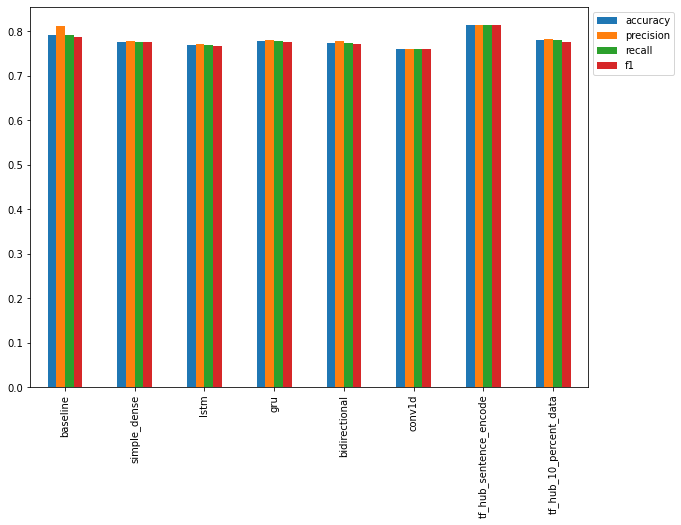

In [94]:
 #Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

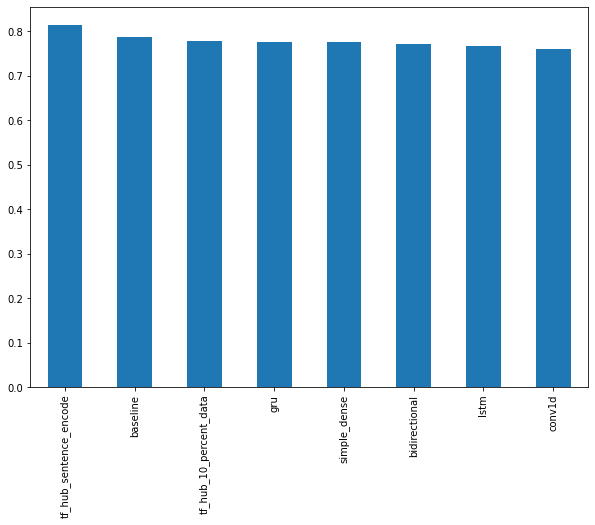

In [95]:
# Sort model results by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

In [96]:
# # View tensorboard logs of transfer learning modelling experiments (should be 4 models)
#!tensorboard dev upload --logdir ./model_logs \
 #--name "NLP moddelling experiment"\
 #--description "A series of different NLP modellings experiments with various models"\
 #--one_shot # exits the uploader when upload has finished

In [97]:
# If you need to remove previous experiments, you can do so using the following command
# !tensorboard dev delete --experiment_id EXPERIMENT_ID_TO_DELETE

#Saving and loading a trained model

There are two main ways of saving a model in TensorFlow:

1. The HDF5 format.
2. The SavedModel format (default).

In [98]:
# Save TF Hub Sentence Encoder model to HDF5 format
model_6.save("model_6.h5")

In [99]:
# Load model with custom Hub Layer (required with HDF5 format)
loaded_model_6 = tf.keras.models.load_model("model_6.h5", 
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [100]:
# How does our loaded model perform?
loaded_model_6.evaluate(val_sentence, val_label)

24/24 [==============================] - 1s 8ms/step - loss: 0.4269 - accuracy: 0.8150


[0.4269331395626068, 0.8149606585502625]

Now let's save to the save model format
 

In [101]:
# Save TF Hub Sentence Encoder model to SavedModel format (default)
model_6.save("model_6_SavedModel_format")

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [102]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_6_SavedModel = tf.keras.models.load_model("model_6_SavedModel_format")

In [103]:
# Evaluate loaded SavedModel format
loaded_model_6_SavedModel.evaluate(val_sentence, val_label)

24/24 [==============================] - 1s 9ms/step - loss: 0.4269 - accuracy: 0.8150


[0.4269331395626068, 0.8149606585502625]

# Finding the most wrong examples

* If our model is still isn't perfect what examples is it getting wrong
* And of these wrong examples which one is getting  most wrong(those will prediction probabilities closest to opposite class)

For eg if a sample should have a label of 0 but our model predict probability of 0.999(which is really close to 1) and vice versa

In [104]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2021-05-28 11:08:52--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  43.7MB/s    in 13s     

2021-05-28 11:09:06 (69.1 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [105]:
model_06_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_06_pretrained.evaluate(val_sentence,val_label)

24/24 [==============================] - 1s 9ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723122239112854, 0.8162729740142822]

In [106]:
model_6_pretrained_pred_probs = model_06_pretrained.predict(val_sentence)
model_6_pretrained_pred_probs = tf.squeeze(model_6_pretrained_pred_probs)
model_6_pretrained_pred_probs[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.15975739, 0.74716204, 0.98874855, 0.19622947, 0.7078078 ,
       0.7096749 , 0.98190695, 0.9810662 , 0.94574374, 0.08504029],
      dtype=float32)>

In [107]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentence,
                       "target": val_label,
                       "pred":model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.232302
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.832503
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.992906
3,@camilacabello97 Internally and externally scr...,1,0.0,0.204653
4,Radiation emergency #preparedness starts with ...,1,1.0,0.777252


In [108]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob",ascending = False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.935803
759,FedEx will no longer transport bioterror patho...,0,1.0,0.918075
628,@noah_anyname That's where the concentration c...,0,1.0,0.894729
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.880940
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.863494
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.845735
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.845541
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.844725
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.832503
144,The Sound of Arson,0,1.0,0.829086


A reminder:

* 0 = Not a real diaster Tweet
* 1 = Real diaster Tweet

In [112]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
  _,text,target,pred,prob = row
  print(f"Target:{target},Pred:{int(pred)},Prob:{prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

       


Target:0,Pred:1,Prob:0.9358030557632446
Text:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target:0,Pred:1,Prob:0.9180748462677002
Text:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target:0,Pred:1,Prob:0.8947287201881409
Text:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target:0,Pred:1,Prob:0.8809401392936707
Text:
@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods

----

Target:0,Pred:1,Prob:0.8634936213493347
Text:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

Target:0,Pred:1,Prob:0.8457349538803101
Text:
åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Tent Collapse Story: Correction: Tent Collapse story åÈ http://t.co/fDJUYvZMrv @wizkidayo

----

Target:0,Pred:1,Prob:0.8455408215522766
Text:
Ashes 2015: 

# Making predictions on the test dataset

In [119]:
# Turn Tweet into string
daniels_tweet = "Life like an ensemble: take the best choices from others and make your own"

In [120]:
def predict_on_sentence(model, sentence):
  """
  Uses model to make a prediction on sentence.

  Returns the sentence, the predicted label and the prediction probability.
  """
  pred_prob = model.predict([sentence])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"Pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"Prob: {pred_prob[0][0]}")
  print(f"Text:\n{sentence}")

In [121]:
# Make a prediction on Tweet from the wild
predict_on_sentence(model=model_6, # use the USE model
                    sentence=daniels_tweet)

Pred: 0.0 (not real disaster) Prob: 0.05669981613755226
Text:
Life like an ensemble: take the best choices from others and make your own


In [124]:
disaster = " A two-storey building collapsed in Makhdumpur, Jehanabad. No casualties reported so far. "

In [125]:
predict_on_sentence(model=model_6, # use the USE model
                    sentence=disaster)

Pred: 1.0 (real disaster) Prob: 0.9883749485015869
Text:
 A two-storey building collapsed in Makhdumpur, Jehanabad. No casualties reported so far. 


# The speed/score tradeoff

In [130]:
# Calculate the time of predictions
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  
  Args:
  ----
  model = a trained model
  sample = a list of samples

  Returns:
  ----
  total_time = total elapsed time for model to make predictions on samples
  time_per_pred = time in seconds per single sample
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculate how long predictions took to make
  time_per_pred = total_time/len(val_sentence) # find prediction time per sample
  return total_time, time_per_pred

In [131]:
# Calculate TF Hub Sentence Encoder prediction times
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model_6, val_sentence)
model_6_total_pred_time, model_6_time_per_pred

(0.2222102350001478, 0.00029161448162749054)

In [133]:
 #Calculate Naive Bayes prediction times
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentence)
baseline_total_pred_time, baseline_time_per_pred

(0.015493912999772874, 2.033321915980692e-05)

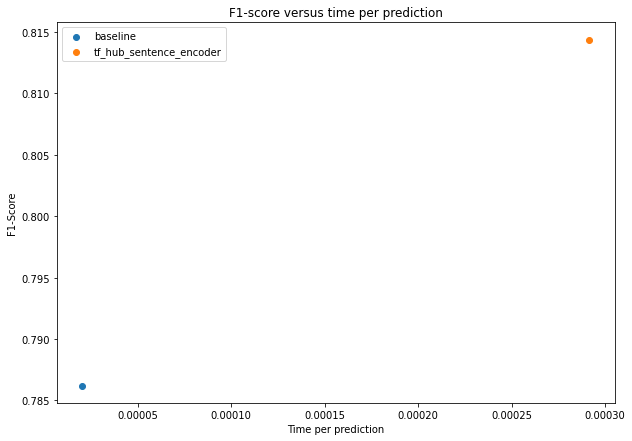

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-Score");